In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train=pd.read_csv('/content/drive/My Drive/Task 3 NLP/train_df.csv')  # reading the data
print(train.shape)
train.head(5)

(25000, 2)


,review,sentiment
0,Cute idea... salesgirl Linda Smith (Yolande Do...,1
1,The beginning of this movie was good. It start...,0
2,"I watched this movie, and hoped for something ...",0
3,"End Game started well, the least said about th...",0
4,"A very silly movie, this starts with a soft po...",1


In [4]:
test=pd.read_csv('/content/drive/My Drive/Task 3 NLP/test_df.csv')
print(test.shape)
test.head(5)

(25000, 2)


,review,sentiment
0,i found this Robin Williams vehicle mildly amu...,0
1,Working the night shift in a seedy police stat...,1
2,In this era when almost everything makes it on...,1
3,This was Charlie Chaplin's first all-talking f...,1
4,"Terrific movie: If you did not watch yet, you ...",1


In [0]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]*\<.?>|!|\'|"|#.|,|)|(]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
train['review']= train['review'].apply(denoise_text)
test['review'] = test['review'].apply(denoise_text)

In [0]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

train['review']= train['review'].apply(remove_special_characters)
test['review']= test['review'].apply(remove_special_characters)

In [8]:
test.head()

,review,sentiment
0,i found this Robin Williams vehicle mildly amu...,0
1,Working the night shift in a seedy police stat...,1
2,In this era when almost everything makes it on...,1
3,This was Charlie Chaplins first alltalking fil...,1
4,Terrific movie If you did not watch yet you mu...,1


In [9]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#Bag of words vector with bi-grams
count_vect = CountVectorizer(stop_words=stopwords.words('english'),ngram_range = (1, 2))
count_vect = count_vect.fit(train["review"].values)
bigram_wrds = count_vect.transform(train["review"].values)

TF-IDF:

In [0]:
count_vect_tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),ngram_range = (1, 2))
count_vect_tfidf = count_vect_tfidf.fit(train["review"].values)
tfidf_wrds  = count_vect_tfidf.transform(train["review"].values)

In [0]:
test_bigram = count_vect.transform(test["review"].values)

In [0]:
test_tfidf = count_vect_tfidf.transform(test["review"].values)

In [0]:
x_train = bigram_wrds
x_test = test_bigram
y_train = train['sentiment']
y_test = test['sentiment']

Model Building:

acc is on test data: 85.264
train accuracy is: 99.908
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     12500
           1       0.88      0.81      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



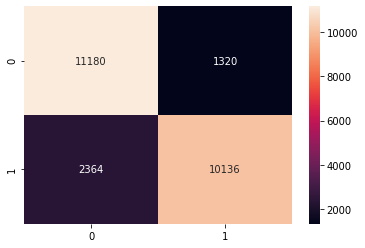

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha = 0.7)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
acc = accuracy_score(y_test, pred, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, clf.predict(x_train), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred))

Logistic Regression:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


acc is on test data: 88.632
train accuracy is: 100.0
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     12500
           1       0.89      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



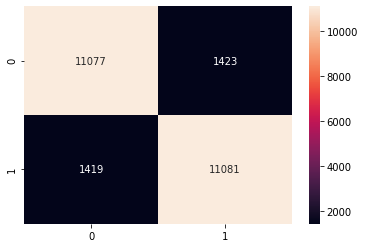

In [19]:
lr=LogisticRegression(random_state=123)
lr.fit(x_train, y_train)
pred1 = lr.predict(x_test)
acc = accuracy_score(y_test, pred1, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred1),annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, lr.predict(x_train), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred1))

Cross checking the performance of model:

In [0]:
review = ["This is a worst movie","This is a wonderful movie"]

In [0]:
vectorize = CountVectorizer(vocabulary = count_vect.vocabulary_)
#Use classifier we trained using Bag of words
polarity = lr.predict(vectorize.transform(review))

https://stackoverflow.com/questions/28894756/countvectorizer-does-not-print-vocabulary

In [22]:
print(polarity)   # the model predicts correctly

[0 1]


Running the model with TFIDF:

In [0]:
x_tr = tfidf_wrds
x_tst = test_tfidf

acc is on test data: 86.29599999999999
train accuracy is: 99.404
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     12500
           1       0.89      0.83      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



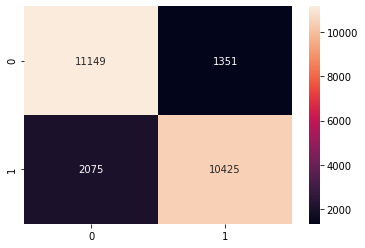

In [24]:
clf = MultinomialNB(alpha = 0.7)
clf.fit(x_tr, y_train)
pred = clf.predict(x_tst)
acc = accuracy_score(y_test, pred, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, clf.predict(x_tr), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred))

acc is on test data: 87.94800000000001
train accuracy is: 96.34
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



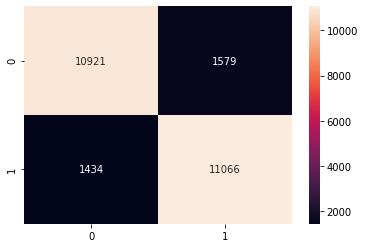

In [26]:
lr=LogisticRegression(random_state=123)
lr.fit(x_tr, y_train)
pred1 = lr.predict(x_tst)
acc = accuracy_score(y_test, pred1, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred1),annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, lr.predict(x_tr), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred1))

In [0]:
from sklearn.ensemble import RandomForestClassifier

acc is on test data: 87.94800000000001
train accuracy is: 100.0
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



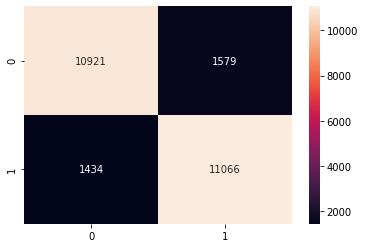

In [28]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
rfc.fit(x_tr, y_train)
pred1 = lr.predict(x_tst)
acc = accuracy_score(y_test, pred1, normalize = True) * float(100)  
print("acc is on test data:", acc)
sns.heatmap(confusion_matrix(y_test, pred1),annot = True, fmt = 'd')
train_acc = accuracy_score(y_train, rfc.predict(x_tr), normalize = True) * float(100)
print("train accuracy is:", train_acc)
print(classification_report(y_test, pred1))

<function matplotlib.pyplot.show>

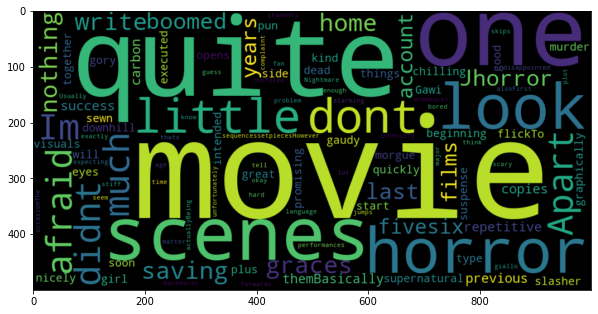

In [32]:
plt.figure(figsize=(10,10))
positive_text=train.review[5]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

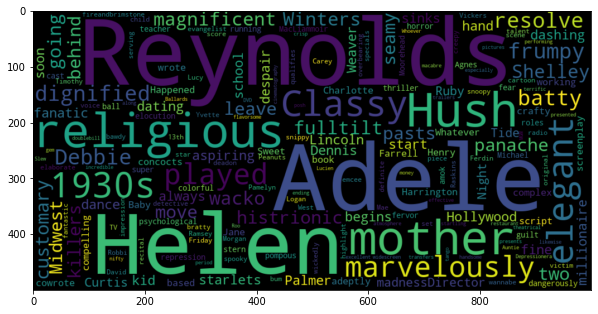

In [34]:
plt.figure(figsize=(10,10))
negative_text=train.review[10]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

In [0]:
vocabulary = count_vect.vocabulary_

In [36]:
vocabulary

{'cute': 408743,
 'idea': 863728,
 'salesgirl': 1503515,
 'linda': 1019500,
 'smith': 1624203,
 'yolande': 2000847,
 'donlan': 490355,
 'inherits': 891844,
 'teeny': 1751309,
 'tiny': 1798922,
 'little': 1025086,
 'county': 383408,
 'lampidorra': 973831,
 'country': 382511,
 'wasnt': 1916508,
 'even': 568080,
 'north': 1216656,
 'america': 81022,
 'made': 1060941,
 '49th': 14494,
 'state': 1671325,
 'course': 384865,
 '48': 14428,
 'states': 1672089,
 'time': 1791787,
 'since': 1605718,
 '1952': 5987,
 'travels': 1823541,
 'inherited': 891802,
 'follow': 679499,
 'along': 69412,
 'tries': 1827622,
 'figure': 641487,
 'strange': 1691857,
 'quirkier': 1403182,
 'people': 1297078,
 'one': 1243528,
 'point': 1340996,
 'sings': 1609007,
 'song': 1638487,
 'claims': 315711,
 'navajo': 1192357,
 'gets': 730660,
 'evermore': 575733,
 'sillier': 1600933,
 'although': 75511,
 'donlans': 490363,
 'heavy': 811656,
 'lipstick': 1022809,
 'omnipresent': 1243267,
 'smile': 1623762,
 'never': 1200846,

In [37]:
bigram_wrds.shape

(25000, 2009085)